In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [13]:
checkpointer=MemorySaver()

In [4]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [5]:
def chat_node(state: ChatState):
    """A simple chat node that interacts with the user."""
    chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
    
    messages = state['messages']
    response = chat_model.invoke(messages)
    
    return {"messages":[response]}

In [14]:
graph=StateGraph(ChatState)
graph.add_node("chat_node",chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot=graph.compile(checkpointer=checkpointer)

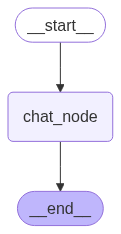

In [15]:
chatbot

In [9]:
initial_state = {    "messages": [HumanMessage(content="Are you better than chatgpt?")]}
chatbot.invoke(initial_state)['messages'][-1].content

'I am a large language model, trained by Google. ChatGPT is also a large language model, developed by OpenAI.\n\nThe concept of "better" is subjective and highly depends on the specific task, the user\'s needs, and the criteria for evaluation.\n\nHere\'s a breakdown:\n\n1.  **Different Developers & Architectures:** We are built on different underlying architectures and trained on different datasets by different companies (Google vs. OpenAI). This means our internal workings, training methodologies, and specific knowledge bases will have differences.\n2.  **Strengths & Weaknesses Vary:** Both of us are excellent at a wide range of tasks, including answering questions, generating text, summarizing, translating, and creative writing. However, each might have subtle differences in their strengths. For example:\n    *   One might be more concise, the other more verbose.\n    *   One might excel in creative writing, while the other is stronger in factual recall or code generation.\n    *   O

In [21]:
thread_id='1'

while True:
    user_input = input("Type Here: ")
    print(f"You: {user_input}")
    if user_input.strip().lower() in ["exit", "quit","bye"]:
        print("Exiting the chatbot.")
        break
    initial_state = {"messages": [HumanMessage(content=user_input)]}
    config={
        'configurable':{'thread_id':thread_id},
    }
    response = chatbot.invoke(initial_state,config=config)
    print(f"Chatbot: {response['messages'][-1].content}")

You: write some synnonyms name of my name
Chatbot: Okay, Anik, let's re-address that!

As we discussed, personal names don't have "synonyms" in the way common words do (like "happy" and "joyful"). You can't replace your name with another and have it mean the exact same person.

However, we can look for names or words that share similar **meanings** or **qualities** based on the origins of "Anik."

Here are some "synonym-like" names or concepts based on your name's meanings:

**If we consider the Sanskrit meaning ("splendor," "bright," "leader," "foremost"):**

*   **Names with similar meanings:**
    *   **Rohan** (ascending, bright)
    *   **Kiran** (ray of light)
    *   **Tejas** (radiance, luster)
    *   **Pratham** (first, foremost)
    *   **Arjun** (bright, shining, also a prominent warrior)
*   **Qualities/Concepts:**
    *   Radiance
    *   Brilliance
    *   Leadership
    *   Pioneer
    *   Champion

**If we consider the French meaning ("grace," "favor," as a diminutive 

In [22]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is anik', additional_kwargs={}, response_metadata={}, id='31c9218e-1ef2-4dbf-9946-db22b3226127'), AIMessage(content="Hi Anik, it's nice to meet you!", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--98b1e17f-3840-4b30-aeb6-fec901ec732c-0', usage_metadata={'input_tokens': 7, 'output_tokens': 37, 'total_tokens': 44, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 25}}), HumanMessage(content='do you know the meaning of my name', additional_kwargs={}, response_metadata={}, id='1a14bf70-1367-4b63-97d6-f04ee4b17fa0'), AIMessage(content='Yes, I do! The name Anik has a few interesting origins and meanings, depending on the cultural context:\n\n1.  **Indian (Sanskrit) Origin:**\n    *   In Sanskrit, Anik (अनीक) primarily means "army," "splendor," "brigh